<a href="https://colab.research.google.com/github/skozh/ADA1/blob/master/Task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import MFO
import time

**Weighted Undirected Graph**

In [2]:
G = nx.gnm_random_graph(100, 500)
for (u, v) in G.edges():
  G.edges[u, v]['weight'] = np.random.randint(0,100)

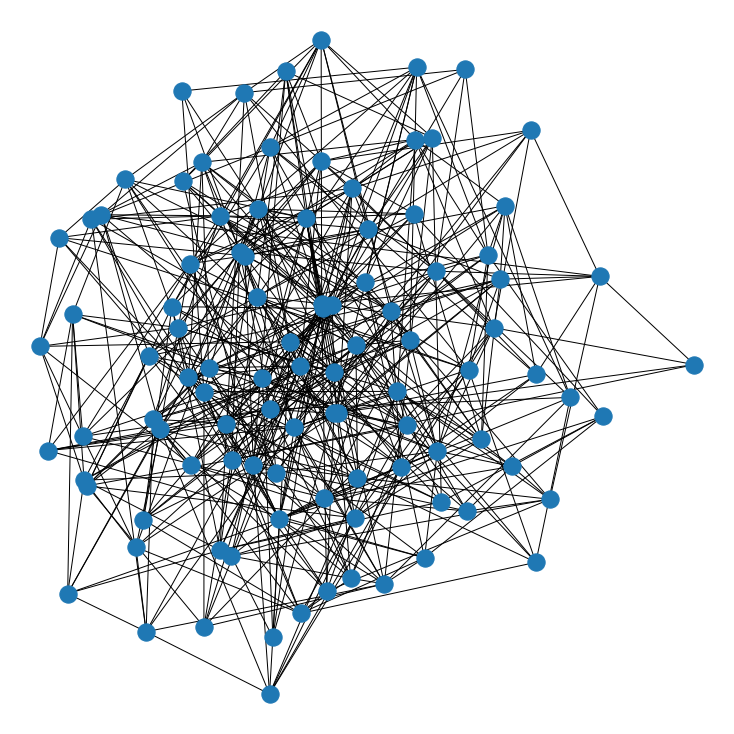

In [3]:
plt.figure(figsize=(10,10))
nx.draw(G)
plt.show()

In [4]:
adj = nx.adjacency_matrix(G).toarray()
adj

array([[ 0, 36,  0, ...,  0,  0,  0],
       [36,  0,  0, ...,  0,  0, 14],
       [ 0,  0,  0, ...,  0,  0, 15],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 14, 15, ...,  0,  0,  0]], dtype=int64)

**Minimum Spanning Tree: Kruskal's Algorithm**

In [5]:
start_time = time.time()
mst = nx.tree.minimum_spanning_edges(G, algorithm="kruskal", data=False)
elapsed = time.time() - start_time
edgelist = list(mst)
print(sorted(sorted(e) for e in edgelist))

[[0, 16], [0, 65], [1, 14], [1, 76], [1, 99], [2, 44], [2, 48], [2, 75], [2, 99], [3, 31], [3, 99], [4, 36], [4, 43], [5, 36], [5, 40], [5, 77], [6, 10], [6, 62], [7, 48], [8, 18], [8, 35], [8, 73], [9, 57], [11, 16], [12, 27], [12, 73], [13, 34], [14, 38], [15, 49], [15, 62], [15, 72], [15, 92], [16, 30], [16, 42], [16, 57], [16, 64], [16, 71], [16, 96], [17, 81], [18, 25], [18, 47], [18, 59], [18, 79], [19, 21], [20, 93], [21, 69], [22, 47], [23, 26], [23, 99], [24, 54], [24, 70], [25, 98], [26, 94], [27, 28], [27, 89], [29, 66], [29, 67], [32, 98], [33, 36], [33, 87], [34, 67], [35, 39], [35, 41], [35, 85], [35, 88], [36, 84], [37, 50], [37, 77], [40, 78], [41, 58], [44, 91], [45, 72], [46, 63], [47, 53], [48, 74], [49, 90], [51, 53], [52, 78], [53, 86], [53, 93], [55, 59], [56, 80], [60, 61], [60, 90], [62, 86], [63, 70], [63, 80], [63, 81], [63, 99], [64, 97], [67, 89], [68, 97], [69, 91], [71, 73], [71, 81], [78, 85], [82, 95], [82, 97], [83, 90]]


In [6]:
print(elapsed)

0.00010919570922851562


In [7]:
start_time = time.time()
mst_2 = nx.tree.minimum_spanning_edges(G, algorithm="prim", data=False)
elapsed_test = time.time() - start_time
print(elapsed_test)

8.392333984375e-05


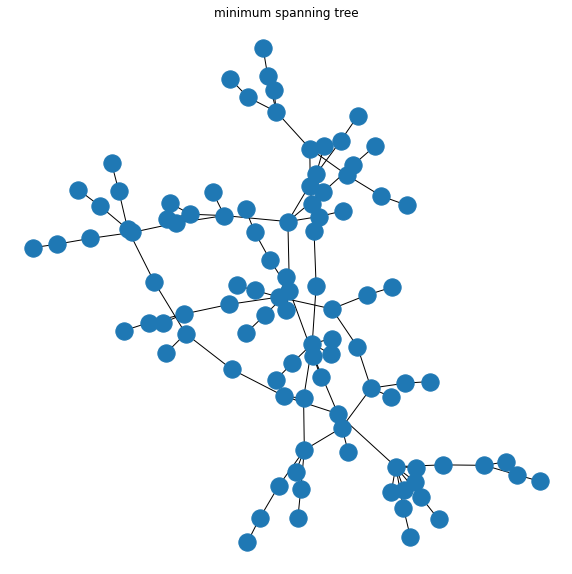

In [8]:
G_prime = nx.Graph()
G_prime.add_edges_from(edgelist)
plt.figure(figsize=(10,10))
plt.title('minimum spanning tree')
nx.draw(G_prime)

**Moth Flame Optimization** (*Moth-flame optimization algorithm, 2015 Seyedali Mirjalili)*

In [9]:
# Objective Functions

def Objective1(x):
  return np.sum(np.power(x, 4), axis=1)

def Objective2(x):
  return np.sum(abs(x-0.2), axis=1)

def Objective3(x):
  return np.sum(x*np.sin(1/x), axis=1)

In [10]:
# Parameters
nsa = 30  #number of search agents
max_iter = 1000

lb = -100
ub = 100
dim = 10

1.6422203182291633e-57
[-1.63069429e-15  8.27757066e-16  6.13813217e-15  1.44307122e-15
  3.28177988e-16  3.57198919e-15  2.20919416e-15  2.20040209e-15
  2.57268541e-16  9.27079117e-16]


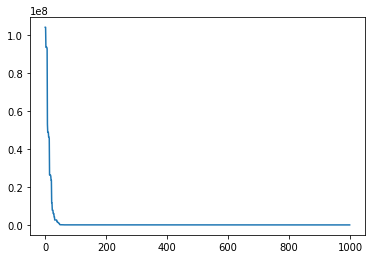

In [11]:
elapsed_mfo = np.zeros((3))
start_time = time.time()
FlameScore, FlamesPos, convergenceCurve = MFO.MFO(nsa, dim, ub, lb, max_iter, Objective1)
elapsed_mfo[0] = time.time() - start_time

print(FlameScore)
print(FlamesPos)
x = np.arange(0, max_iter, 1)
plt.plot(x, convergenceCurve)
plt.show()

0.0
[0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]


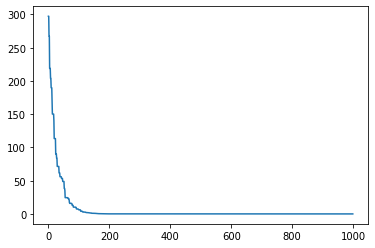

In [12]:
start_time = time.time()
FlameScore, FlamesPos, convergenceCurve = MFO.MFO(nsa, dim, ub, lb, max_iter, Objective2)
elapsed_mfo[1] = time.time() - start_time
print(FlameScore)
print(FlamesPos)
x = np.arange(0, max_iter, 1)
plt.plot(x, convergenceCurve)
plt.show()

1.4793146027714477
[   0.22254816 -100.            0.22254816   -0.22254816    0.22254816
 -100.            0.22254816    0.22254816    0.22254816 -100.        ]


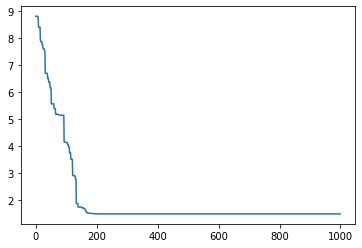

In [13]:
start_time = time.time()
FlameScore, FlamesPos, convergenceCurve = MFO.MFO(nsa, dim, ub, lb, max_iter, Objective3)
elapsed_mfo[2] = time.time() - start_time

print(FlameScore)
print(FlamesPos)
x = np.arange(0, max_iter, 1)
plt.plot(x, convergenceCurve)
plt.show()

In [14]:
elapsed_mfo

array([0.15507078, 0.13118696, 0.12005806])

In [15]:
np.average(elapsed_mfo)

0.135438601175944